## Finite Precesion Arithmetic
---
**Agenda**
1. Finite Precision Mathematics on a Computer
2. Issues of stability, efficiency and accuracy.

In [12]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets

## Set a seed for the random number generator
np.random.seed(100)

## Floating Point Representation: A Discussion
---

In [11]:
print(0.1+0.2==0.3)
#a=1/3
#print("a is {0:0.25f}".format(a))bb

False


**Example** What should be the output of $x_{20}$ when $x_1 = 1/10$ and $x_{n+1}  =f(x_n)$.

[Following Example Source](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/1.%20Why%20are%20we%20here.ipynb#Accuracy)

In [13]:
def f(x):
    if x <= 0.5:
        return 2 * x
    else:
        return 2*x - 1

In [15]:
x = 1/10
for i in range(100):
    print(x)
    x = f(x)
    

0.1
0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057
0.8000000000000114
0.6000000000000227
0.20000000000004547
0.40000000000009095
0.8000000000001819
0.6000000000003638
0.2000000000007276
0.4000000000014552
0.8000000000029104
0.6000000000058208
0.20000000001164153
0.40000000002328306
0.8000000000465661
0.6000000000931323
0.20000000018626451
0.40000000037252903
0.8000000007450581
0.6000000014901161
0.20000000298023224
0.4000000059604645
0.800000011920929
0.6000000238418579
0.20000004768371582
0.40000009536743164
0.8000001907348633
0.6000003814697266
0.20000076293945312
0.40000152587890625
0.8000030517578125
0.600006103515625
0.20001220703125
0.4000244140625
0.800048828125
0.60009765625
0.2001953125
0.400390625
0.80078125
0.6015625
0.203125
0.40625
0.8125
0.625
0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.

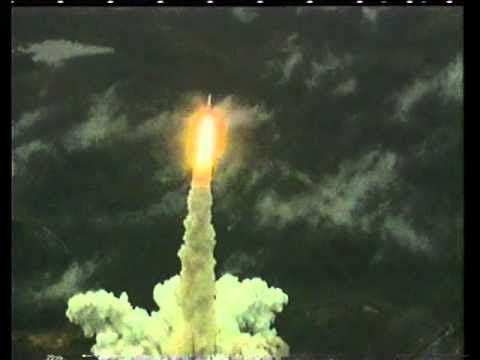

In [5]:

from IPython.display import YouTubeVideo
YouTubeVideo("gp_D8r-2hwk")

[Some insight on Arian 5 disaster here](http://www-users.math.umn.edu/~arnold/disasters/ariane.html)

#### Stability: An example

In [6]:
# The following difference equation has the solution x_n = =1/3^n. 
x=np.zeros((40,1),dtype=float)
x[0]=1.0
x[1]=1.0/3
for n in range(1,39):
    x[n+1]= (13.0/3.0) * x[n] - (4.0/3.0) * x[n-1]

print(x.T)

[[ 1.00000000e+00  3.33333333e-01  1.11111111e-01  3.70370370e-02
   1.23456790e-02  4.11522634e-03  1.37174211e-03  4.57247371e-04
   1.52415789e-04  5.08052602e-05  1.69350748e-05  5.64497734e-06
   1.88146872e-06  6.26394672e-07  2.05751947e-07  5.63988754e-08
  -2.99408028e-08 -2.04941979e-07 -8.48160840e-07 -3.40210767e-06
  -1.36115854e-05 -5.44473934e-05 -2.17789924e-04 -8.71159813e-04
  -3.48463929e-03 -1.39385572e-02 -5.57542287e-02 -2.23016915e-01
  -8.92067659e-01 -3.56827064e+00 -1.42730825e+01 -5.70923302e+01
  -2.28369321e+02 -9.13477283e+02 -3.65390913e+03 -1.46156365e+04
  -5.84625461e+04 -2.33850184e+05 -9.35400738e+05 -3.74160295e+06]]


In [7]:
#  Rearrangement of the expression
x=np.zeros((40,1),dtype=float)
x[0]=1.0
x[1]=1.0/3
for n in range(1,39):#  x[n+1]= 4 * x[n] -   x[n-1] + ( x[n] -   x[n-1])/3
    x[n+1]=  3*x[n] +   4*((x[n] - x[n-1])/3)

print(x.T)

[[ 1.00000000e+00  3.33333333e-01  1.11111111e-01  3.70370370e-02
   1.23456790e-02  4.11522634e-03  1.37174211e-03  4.57247371e-04
   1.52415790e-04  5.08052625e-05  1.69350842e-05  5.64501473e-06
   1.88161826e-06  6.26992820e-07  2.08144541e-07  6.59692518e-08
   8.34070274e-09 -5.18159572e-08 -2.35656751e-07 -9.52091313e-07
  -3.81152002e-06 -1.52471317e-05 -6.09888772e-05 -2.43955626e-04
  -9.75822542e-04 -3.90329018e-03 -1.56131607e-02 -6.24526429e-02
  -2.49810572e-01 -9.99242287e-01 -3.99696915e+00 -1.59878766e+01
  -6.39515064e+01 -2.55806025e+02 -1.02322410e+03 -4.09289641e+03
  -1.63715856e+04 -6.54863425e+04 -2.61945370e+05 -1.04778148e+06]]


#### Care that should be taken while writing numerical algorithms
---
>- Loss of precision: avoid subtraction of close quantities by mathematical manipulations.
>- Minimize the introduction of roundoff errors.
>- Be careful converting large integers.
>- Extra care when iteration is being used.
>- Minimize truncation errors in mathematical terms.

#### IEEE 754 Normalized Binary Form
---
Represents the following binary number
$$\Large
(-1)^s \left( 1+ f\right) \times 2^{e-1023}
$$
<img src="./images/64bit.png" width="800xp" />

[Image](https://en.wikipedia.org/wiki/Double-precision_floating-point_format#/media/File:IEEE_754_Double_Floating_Point_Format.svg)

>- One sign bit, denoted by s.
>- Biased exponent, e, takes 11 bits.
>- The fractional part (mantissa), f, in the normalized form takes 52 bits.

**Example**
\begin{aligned}
(152.356425)_{10} &= (1001 1000 .0101 1011 0011 1110 1011)_2\\
&= (1.001 1000 0101 1011 0011 1110 1011)_2 \times 2^7
\end{aligned}

On comparison with the standard form, we have $e-1023 = 7$, implying that the biased exponent is $$e = 1030 = (1000 0000 110)_2.$$ 
The sign bit should be 0 for a positive number. And the fractional part is   
$$f=.001 100 0101 1010 0111 1101 011$$
Hence $ 152.356425$ in 64-bits is given by
 $$ 0 ~ 100~ 0000~ 0110~  0011~ 0010~ 0001~ 0110~ 1001~ 1111~ 0101~ 1000~ 0000~ 0000~ 0000~ 0000~ 0000.$$ 
(That is  4063 2169 F580 0000 is hexadecimal representation. How? Make groups of four bits to get 16 hexadecimal numbers. For example 0100 is 4, 1111 is F, and so on.)


>- The biased exponent for decimal numbers satisfy: $-1023 < e -1023 < 1024$, or $0<e<2047$.

>- The  value $e=0$ is reserved for some special cases.
>>- When $e=0$ (all zero bits) with $f=0$, it represents **plus or minus zero**.
>>- When $e=0$ with $f \ne 0$, it represents **subnormals** that are small numbers quite close to zero, even smaller than the smallest normalized binary numbers. They are used to handle underflow in floating point arithmetics.

>- The value $e=2047$ is reserved for some special cases.
>>- When $e = 2047$ (all 1 bits) with $f=0$, it represent **plus or minus infinity**
>>- When $e=2047$ (all 1 bits) and $f \ne 0$, it represents  **NaN** (not a number)

>- **Overflow**: When the resulting number from some mathematical operation is larger then the largest possible number, we say that an overflow has occurred.

>- **Underflow**: When the result of an arithmetic operation is quite close to zero beyond the normalized representation, it is called an underflow.

**EXAMPLE** Write the following expressions in ways that avoid the loss of significance due to subtraction of close quantities.

(A) $f(x) = \sqrt{x+1/x} - \sqrt{x - 1/x}.$

(B) $f(x) = \tan{x} - \sin{x}.$